In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [ ]:
import pandas as pd
train = pd.read_csv('train.csv')
print("training set:"%train.columns,train.shape,len(train))


training set: (31962, 3) 31962


In [ ]:
test = pd.read_csv('test.csv')
print("test set:"%test.columns,test.shape,len(test))

test set: (17197, 2) 17197


In [ ]:
import re
def clean_text(df, text_field):
    df[text_field]=df[text_field].str.lower()
    df[text_field]=df[text_field].apply(lambda elem:re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "",elem))
    return df

In [ ]:
test_clean=clean_text(test, "tweet")
train_clean=clean_text(train, "tweet")

In [ ]:
from sklearn.utils import resample
train_majority = train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label==1]
train_minority_upsampled = resample(train_minority, replace=True,n_samples=len(train_majority),random_state=123)

train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['label'].value_counts()


1    29720
0    29720
Name: label, dtype: int64

Text(0.5, 1.0, 'Distribution of sentiments')

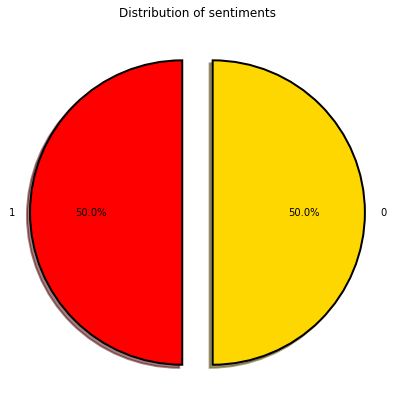

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = train_upsampled['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90,
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
pipeline_sgd=Pipeline([('vect',CountVectorizer()),
                      ('tfidf',TfidfTransformer()),
                      ('nb',SGDClassifier()),])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_upsampled['tweet'],
                                                    train_upsampled['label'],random_state = 0)

In [ ]:
model = pipeline_sgd.fit(X_train, y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import f1_score
print(f1_score(y_test, y_predict)*100 )



96.94707372350352


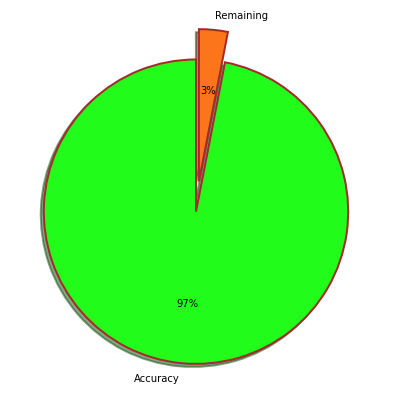

In [ ]:
labels = ('Accuracy', 'Remaining')
fig = plt.figure(figsize=(7,7))
m=f1_score(y_test, y_predict)*100
fracs = [m,100-m]
total = sum(fracs)
colors = ("#22FC1B", "#FC751B")
explode = (0.1,0.1)
wp = {'linewidth':2, 'edgecolor':"brown"}
plt.pie(fracs, explode=explode, labels=labels,colors = colors,
   autopct=lambda p: '{:.0f}%'.format(p * total / 100),wedgeprops=wp,
   shadow=True, startangle=90)

plt.show()
